# **Deteksi Penipuan Kartu Kredit dengan Model Prediktif : Random Forest Classifier, AdaBoost Classifier, XGBoost, LightGBM**


Oleh :
1. 247056004 - Dea Anonna Prayetno Putri
2. 247056008 - Muhammad Ali Syahputra 
3. 247056012 - Ruth Elvin Harianja  
4. 248056014 - Hasnan Aulia Haq 

**Pengenalan Dataset**

Dataset ini berisi transaksi kartu kredit yang dilakukan oleh pemegang kartu asal Eropa pada bulan September 2013. Dataset ini menyajikan transaksi yang terjadi dalam dua hari, dengan 492 transaksi penipuan dari total 284.807 transaksi. Dataset ini sangat tidak seimbang, dengan kelas positif (penipuan) hanya mencakup 0,172% dari seluruh transaksi.

Dataset ini hanya berisi variabel input numerik yang merupakan hasil transformasi Principal Component Analysis (PCA). Karena masalah kerahasiaan, fitur asli dan informasi latar belakang lebih lanjut mengenai data tidak dapat disediakan. Fitur V1, V2, ... V28 adalah komponen utama yang diperoleh dengan PCA. Satu-satunya fitur yang tidak ditransformasikan dengan PCA adalah 'Time' dan 'Amount'. 

- **'Time'**: Fitur ini menunjukkan detik yang telah berlalu antara setiap transaksi dan transaksi pertama dalam dataset.
- **'Amount'**: Fitur ini menunjukkan jumlah transaksi. Fitur ini dapat digunakan untuk pembelajaran sensitif terhadap biaya tergantung pada contoh, di mana transaksi penipuan sering kali dikaitkan dengan jumlah transaksi yang tidak biasa.

Fitur **'Class'** adalah variabel respons yang menunjukkan apakah transaksi merupakan penipuan (1) atau tidak penipuan (0).

**Akses Dataset**

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_df = pd.read_csv(r'C:\Users\ASUS\Documents\KULIAH\Sem 1\5102 - Kecerdasan Buatan\UAS\creditcard.csv')

**Cek Dimensi Dataset**

In [103]:
print("Credit Card Fraud Detection data -  rows:",data_df.shape[0]," and columns:", data_df.shape[1])

Credit Card Fraud Detection data -  rows: 284807  and columns: 31


**Menampilkan 5 Data Teratas**

In [104]:
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Statistik Deskriptif Dataset**

In [105]:
data_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Cek Missing Value**

In [106]:
missing_data = data_df.isnull().sum()
print(missing_data)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


**Analisis Missing Value**

In [107]:
#data_df.isnull(): Menghasilkan DataFrame boolean yang menunjukkan True jika data hilang (NaN), False jika tidak
#sum(): Menjumlahkan nilai True di setiap kolom untuk menghitung total missing data
#sort_values(ascending=False): Mengurutkan total missing data dari yang terbesar ke terkecil
total = data_df.isnull().sum().sort_values(ascending=False)

#data_df.isnull().sum(): Menghitung total missing data per kolom
#data_df.isnull().count(): Menghitung total baris per kolom (termasuk nilai non-missing)
#/: Membagi jumlah missing data dengan jumlah total data per kolom untuk mendapatkan persentase
#* 100: Mengonversi hasil pembagian ke dalam bentuk persentase
#sort_values(ascending=False): Mengurutkan persentase dari yang terbesar ke terkecil
percent = (data_df.isnull().sum() / data_df.isnull().count() * 100).sort_values(ascending=False)

#pd.concat(): Menggabungkan dua objek (total dan percent) menjadi satu DataFrame
#axis=1: Menggabungkan secara horizontal (sebagai kolom baru)
#keys=['Total', 'Percent']: Memberi nama kolom hasil gabungan sebagai Total dan Percent
#Membalikkan baris menjadi kolom dan kolom menjadi baris (transpose), sehingga Total dan Percent menjadi indeks
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Tidak ada data yang hilang dalam seluruh dataset.

**Cek Data Unbalanced**

In [108]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

temp = data_df["Class"].value_counts()
df = pd.DataFrame({'Class': temp.index,'values': temp.values})

trace = go.Bar(
    x = df['Class'],y = df['values'],
    name="Credit Card Fraud Class - data unbalance (Not Fraud=0, Fraud=1)",
    marker=dict(color="Red"),
    text=df['values']
)
data = [trace]
layout = dict(title = ('Data Unbalanced on Credit Card Fraud Class (Not Fraud=0, Fraud=1)'),
          xaxis = dict(title = 'Class', showticklabels=True), 
          yaxis = dict(title = 'Number of transactions'),
          hovermode = 'closest',width=650
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='class')

Terdapat 492 (atau 0,172%) transaksi yang merupakan fraud (kecurangan) yang berarti data sangat tidak seimbang terkait dengan variabel target Class.

**Eksplorasi Data berdasarkan *Waktu Transaksi***

In [109]:
import plotly.figure_factory as ff

class_0 = data_df.loc[data_df['Class'] == 0]["Time"]
class_1 = data_df.loc[data_df['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis = dict(title = 'Number of Transaction'), yaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

Transaksi fraud memiliki distribusi yang lebih merata daripada transaksi yang sah - didistribusikan secara merata dalam waktu, termasuk waktu transaksi riil yang rendah, pada malam hari di zona waktu Eropa.

Berikut langkah-langkah yang dilakukan untuk menganalisis distribusi waktu dari transaksi dalam dataset, dengan fokus pada kedua kelas (Transaksi Not Fraud dan Transaksi Fraud).

a. Analisis data transaksi berdasarkan jam transaksi (dihitung dari kolom Time) untuk melihat bagaimana transaksi berbeda antara kelas not fraud (0) dan fraud (1)

In [110]:
#membuat kolom baru "Hour" dengan menghitung Time/3600
#np.floor digunakan untuk membulatkan hasil ke bawah, sehingga setiap nilai waktu dipetakan ke jam terdekat ke bawah (misalnya, 4500 detik menjadi 1 jam, bukan 2 jam).
data_df['Hour'] = data_df['Time'].apply(lambda x: np.floor(x / 3600))

#Agregasi Data Berdasarkan Jam dan Kelas
#Data dikelompokkan berdasarkan kombinasi Hour (jam) dan Class (Not Fraud dan Fraud).
tmp = data_df.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()

#membuat dataframe baru dan memberi nama kolom
df = pd.DataFrame(tmp)
df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


b. Membandingkan pola total nominal transaksi (Sum) berdasarkan waktu (Hour) antar tiap Class (Not Fraud = 0, Fraud = 1)

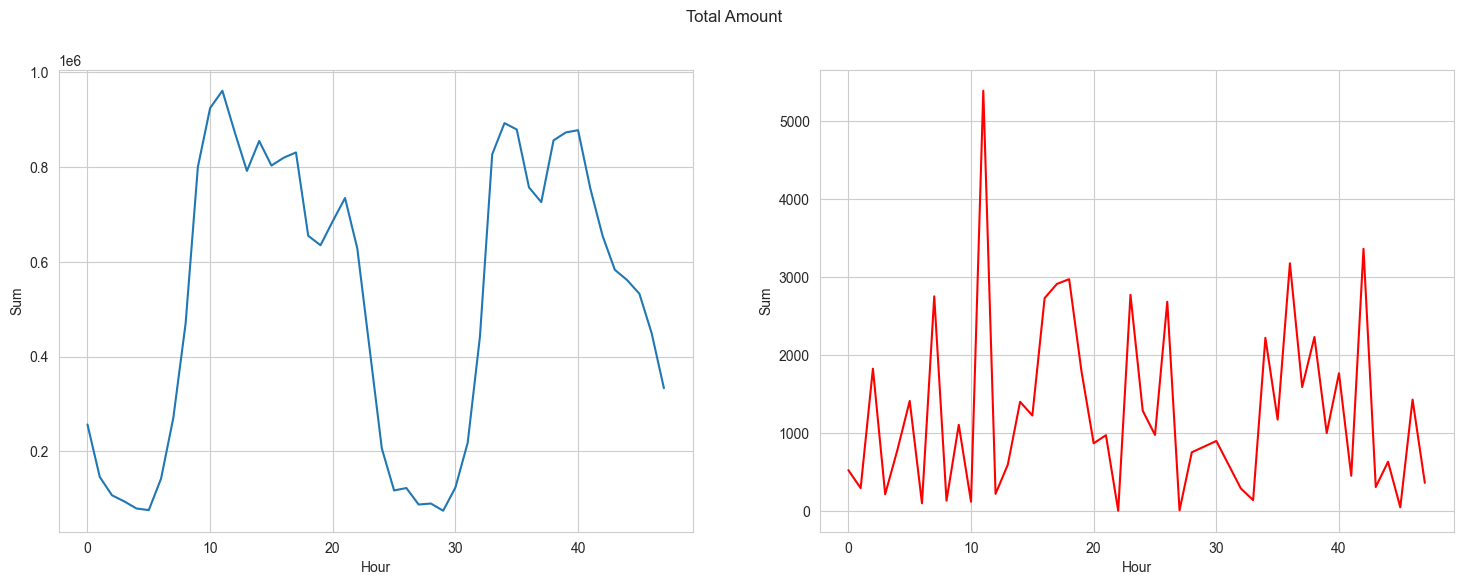

In [111]:
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=df.loc[df.Class==0]) #Not Fraud
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=df.loc[df.Class==1], color="red") #Fraud
plt.suptitle("Total Amount")
plt.show();

c. Membandingkan pola jumlah transaksi (Transactions) berdasarkan waktu (Hour) antar tiap Class

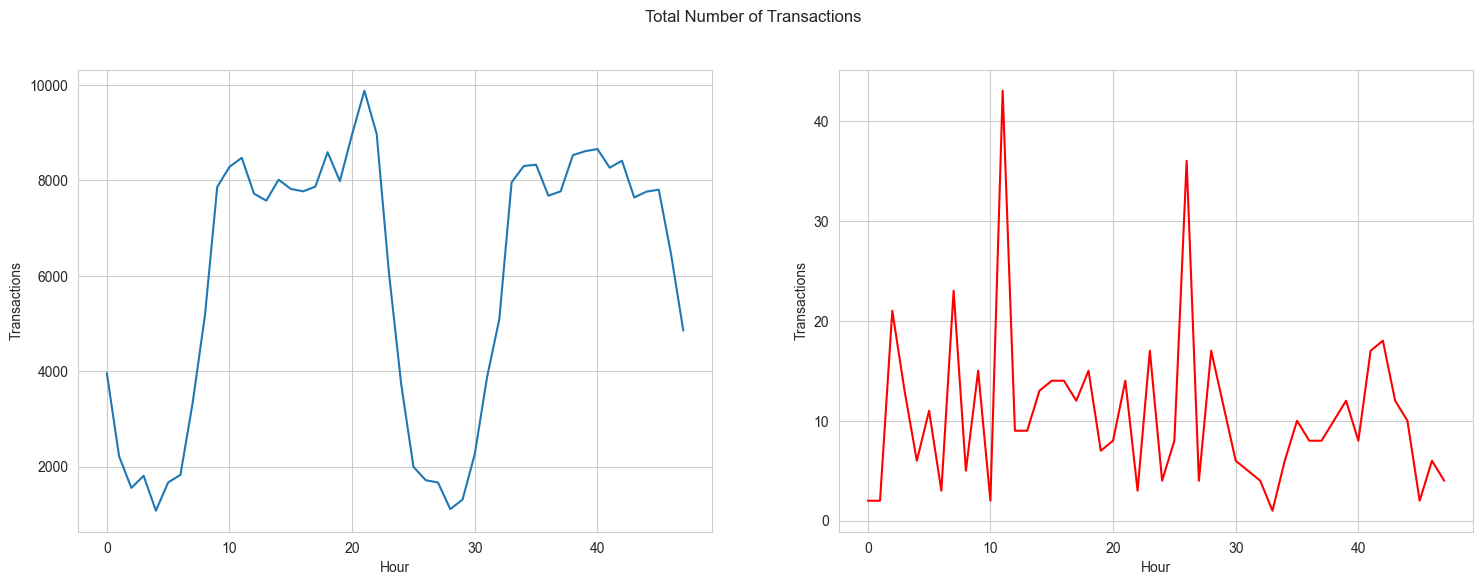

In [112]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Number of Transactions")
plt.show();


d. Membandingkan rata-rata nominal transaksi (Mean) per jam (Hour) antar tiap Class

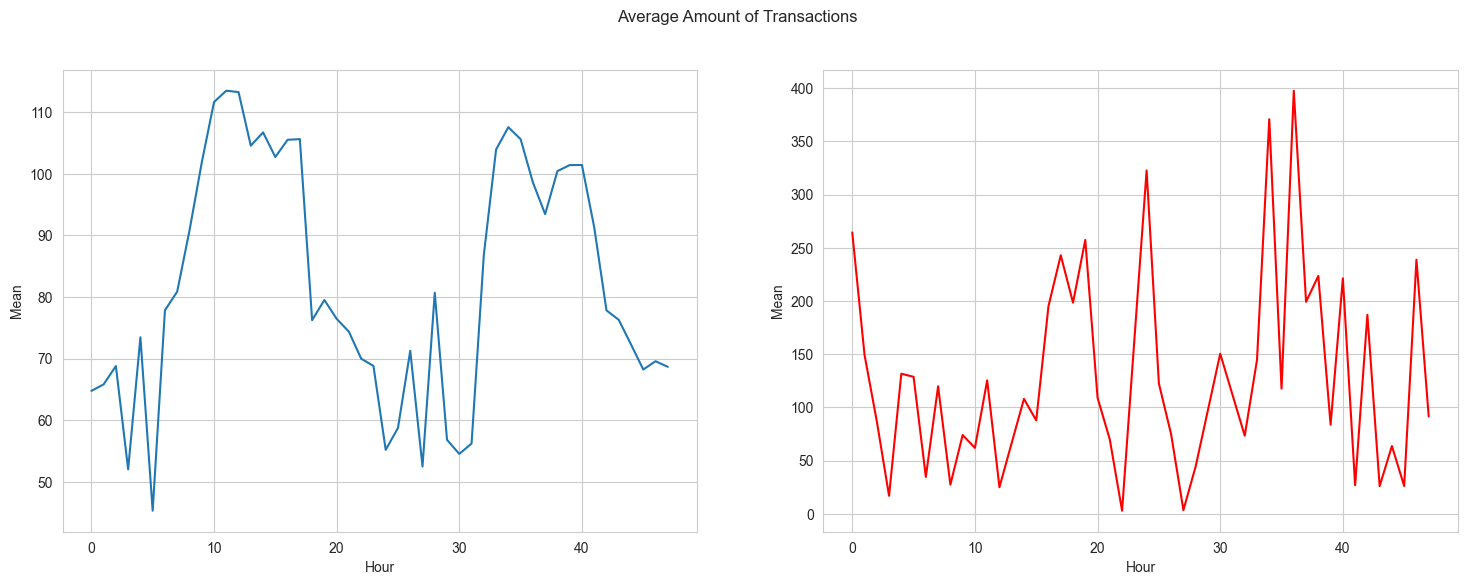

In [113]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Mean", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Mean", data=df.loc[df.Class==1], color="red")
plt.suptitle("Average Amount of Transactions")
plt.show();

e. Membandingkan nilai maksimum transaksi (Max) per jam (Hour) antar tiap Class

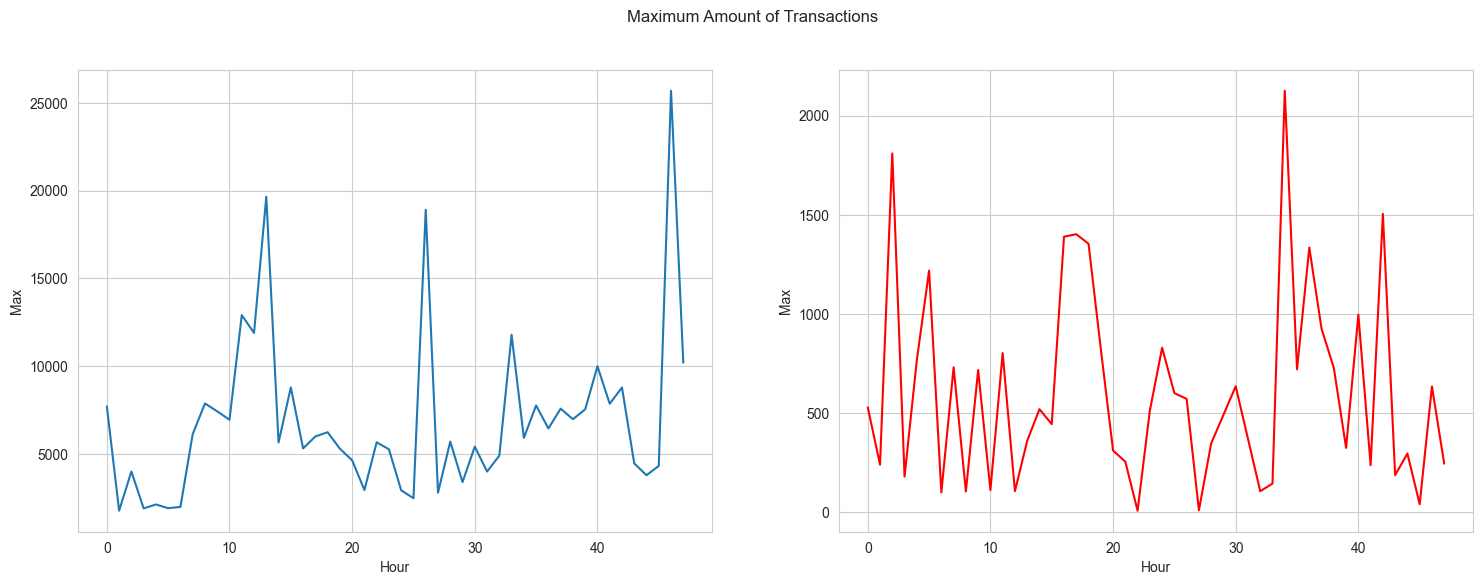

In [114]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Max", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Max", data=df.loc[df.Class==1], color="red")
plt.suptitle("Maximum Amount of Transactions")
plt.show();

f.  Membandingkan nilai tengah (median) nominal transaksi (Median) per jam (Hour) antar tiap Class

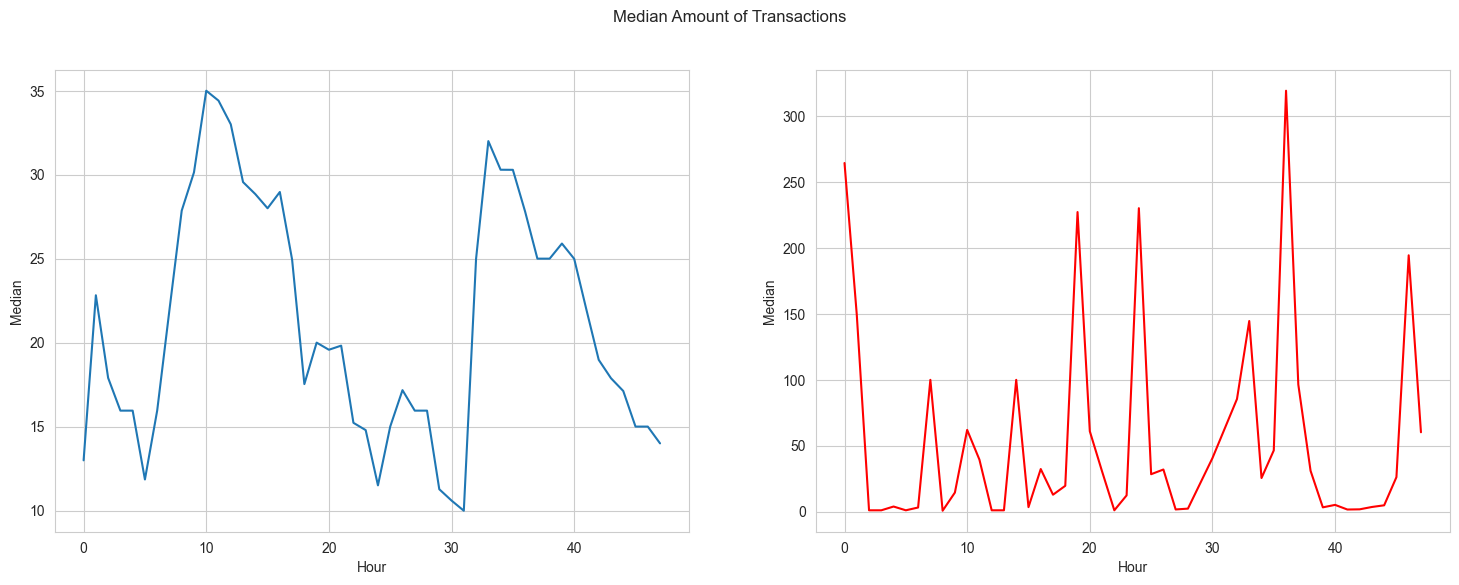

In [115]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Median", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Median", data=df.loc[df.Class==1], color="red")
plt.suptitle("Median Amount of Transactions")
plt.show();

g. Membandingkan nominal transaksi minimum (Min) per jam (Hour) antar tiap Class

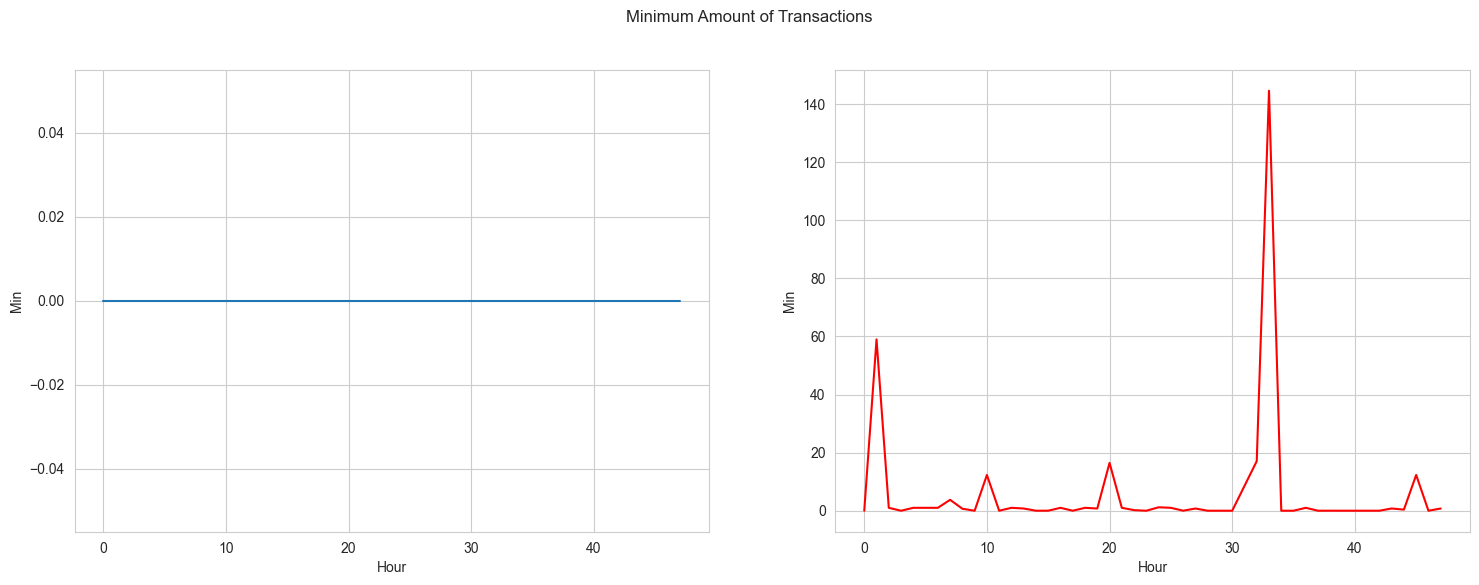

In [116]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Min", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Min", data=df.loc[df.Class==1], color="red")
plt.suptitle("Minimum Amount of Transactions")
plt.show();

**Eksplorasi Data berdasarkan *Jumlah Transaksi***

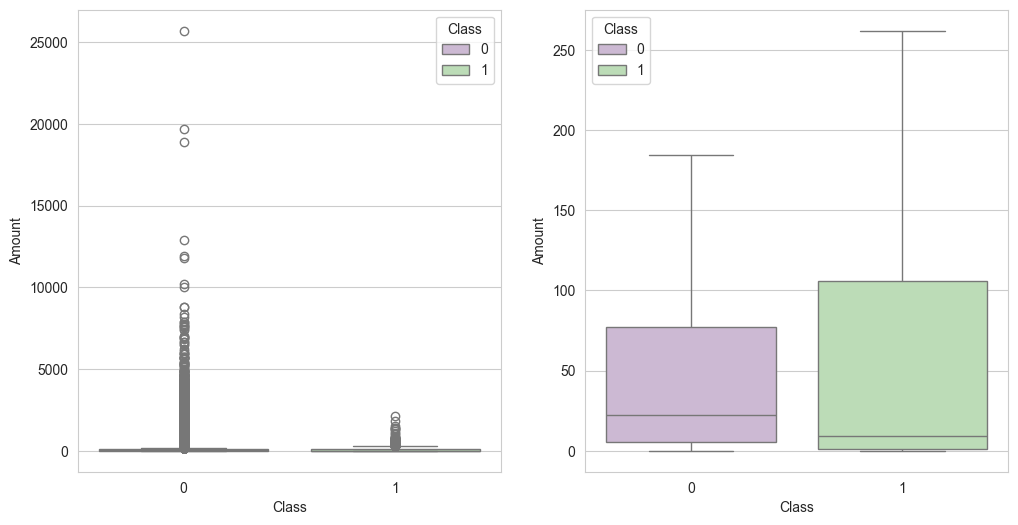

In [117]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=data_df, palette="PRGn",showfliers=True) #memperlihatkan distribusi nominal transaksi, termasuk data outlier, untuk kedua kelas.
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=data_df, palette="PRGn",showfliers=False) #memperlihatkan distribusi nominal transaksi tanpa outlier, data yang berada dalam rentang normal.

plt.show();

a. Statistik Deskriptif untuk Class 0, Not Fraud

In [118]:
tmp = data_df[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Statistik Deskriptif untuk Class = 1, Fraud

In [119]:
class_1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Transaksi Not Fraud memiliki rata-rata yang lebih kecil, Q1 yang lebih besar, Q3 yang lebih kecil, dan rentang nilai yang lebih luas dengan banyak outliers besar, sementara transaksi Fraud memiliki rata-rata yang lebih tinggi, Q1 yang lebih kecil, Q3 yang lebih besar, dan outliers yang lebih sedikit serta nilai maksimum yang lebih rendah.

Perbandingan transaksi Fraud (berdasarkan jumlah) dengan waktu, dimana waktu yang ditampilkan adalah detik dari awal periode waktu (total 48 jam, lebih dari 2 hari)

a. Distribusi Waktu dan Jumlah Transaksi Fraud

In [120]:
fraud = data_df.loc[data_df['Class'] == 1]

trace = go.Scatter(
    x = fraud['Time'],y = fraud['Amount'], 
    name="Amount",
     marker=dict(
                color='rgb(238,23,11)',
                line=dict(
                    color='red',
                    width=1),
                opacity=0.5,
            ),
    text= fraud['Amount'],
    mode = "markers"
)
data = [trace]
layout = dict(title = 'Amount of fraudulent transactions',
          xaxis = dict(title = 'Time [s]', showticklabels=True), 
          yaxis = dict(title = 'Amount'),
          hovermode='closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='fraud-amount')

b. Korelasi antar Fitur dalam Data Transaksi

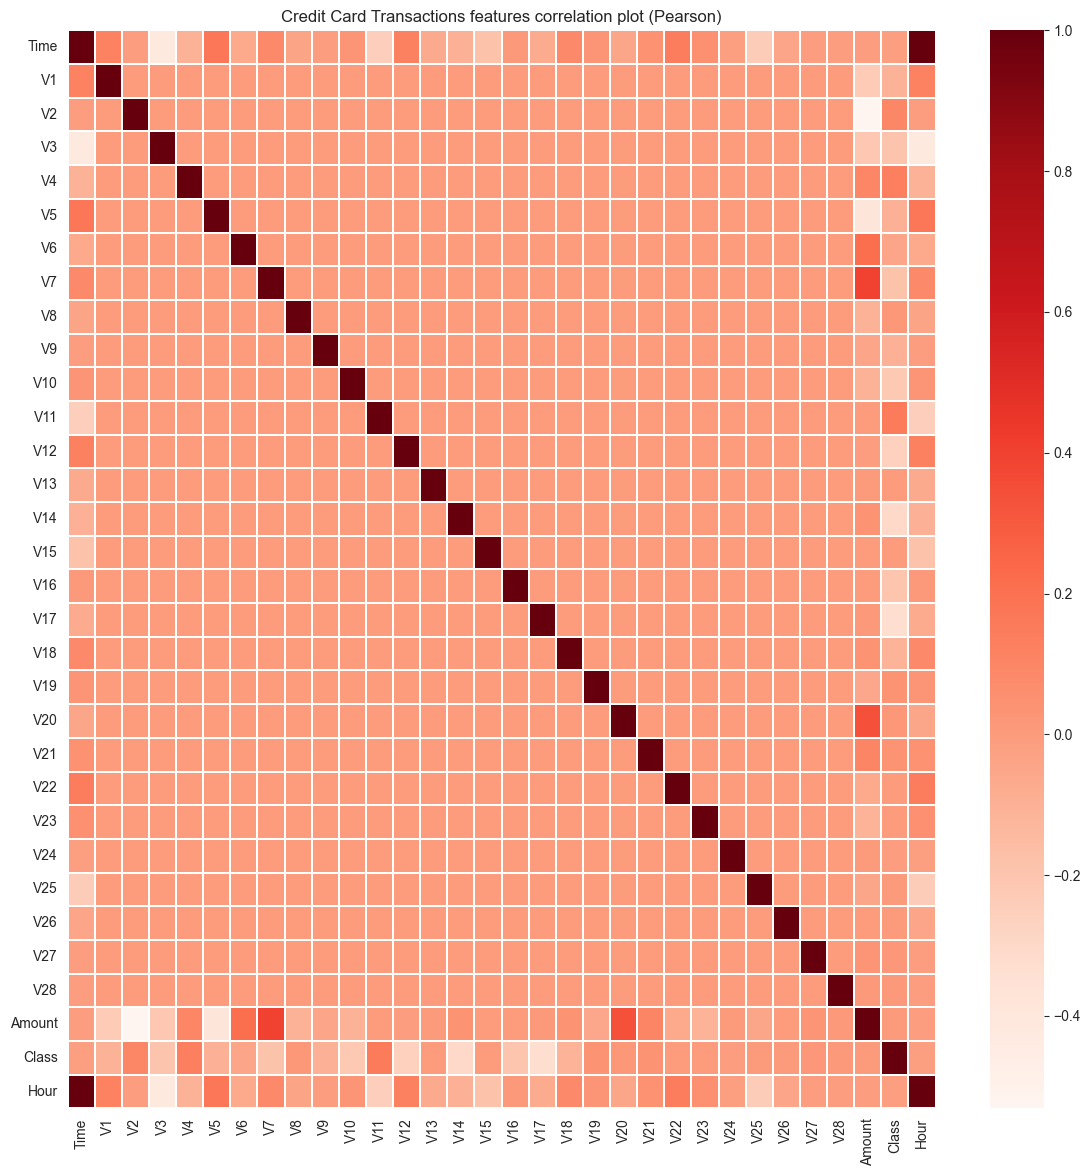

In [121]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = data_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

Setiap kotak dalam heatmap menunjukkan seberapa kuat hubungan linear antara dua fitur, dengan warna yang lebih gelap menunjukkan korelasi yang lebih kuat (baik positif maupun negatif).

Tidak ada korelasi yang signifikan antara fitur V1 hingga V28, yang berarti nilai-nilai fitur ini tidak saling mempengaruhi secara linear.

Meskipun tidak ada korelasi yang signifikan antara V1 hingga V28, beberapa fitur ini memiliki korelasi dengan waktu (Time) dan jumlah uang (Amount):
- Inverse correlation (korelasi terbalik) dengan V3: Ini berarti semakin besar nilai V3, semakin kecil nilai Time, atau sebaliknya.
- Direct corelation (korelasi langsung) dengan V7 dan V20: Artinya, semakin besar nilai V7 atau V20, semakin besar juga nilai Amount.
- Inverse correlation (korelasi terbalik) dengan V1 dan V5: Artinya, semakin besar nilai V1 atau V5, semakin kecil nilai Amount, atau sebaliknya.

Langkah berikutnya adalah menggambarkan nilai-nilai fitur yang memiliki korelasi langsung dan terbalik pada grafik yang sama, untuk memvisualisasikan hubungan antara fitur-fitur tersebut.

Fokus pertama adalah menggambarkan hubungan korelasi langsung antara fitur V20 dengan Amount dan antara fitur V7 dengan Amount.

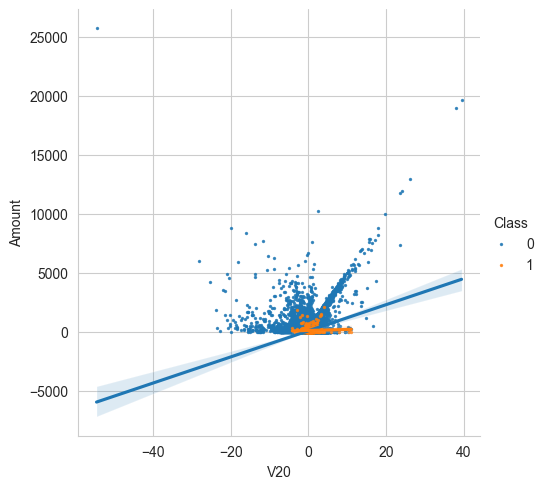

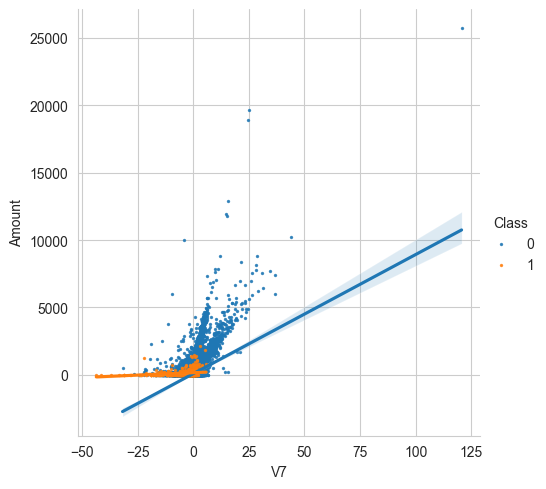

In [122]:
s = sns.lmplot(x='V20', y='Amount',data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='Amount',data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

Dapat dikonfirmasi bahwa dua pasangan fitur yang dianalisis (yaitu V20 dengan Amount, dan V7 dengan Amount) memang memiliki korelasi, yang berarti ada hubungan antara fitur-fitur tersebut dan jumlah transaksi.
- Garis regresi untuk Class = 0 (transaksi bukan fraud) memiliki kemiringan positif yang lebih besar, yang berarti ada hubungan positif yang lebih kuat antara fitur-fitur tersebut dan jumlah transaksi untuk transaksi yang sah.
- Garis regresi untuk Class = 1 (transaksi fraud) juga memiliki kemiringan positif, tetapi lebih kecil. Ini menunjukkan bahwa hubungan antara fitur-fitur tersebut dan jumlah transaksi lebih lemah untuk transaksi yang fraud.

Selanjutnya adalah menggambarkan fitur-fitur yang memiliki korelasi terbalik (inverse correlation)

Berikut visualisasi hubungan antara fitur-fitur V2 dan V5 dengan jumlah transaksi (Amount), sambil membandingkan perbedaan antara transaksi fraud (Class = 1) dan transaksi yang sah (Class = 0) menggunakan regresi linier

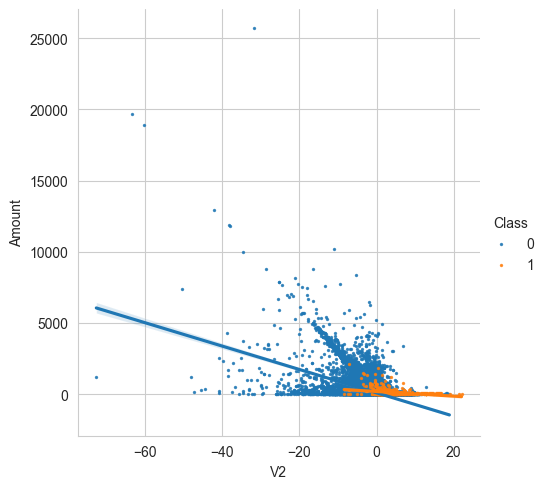

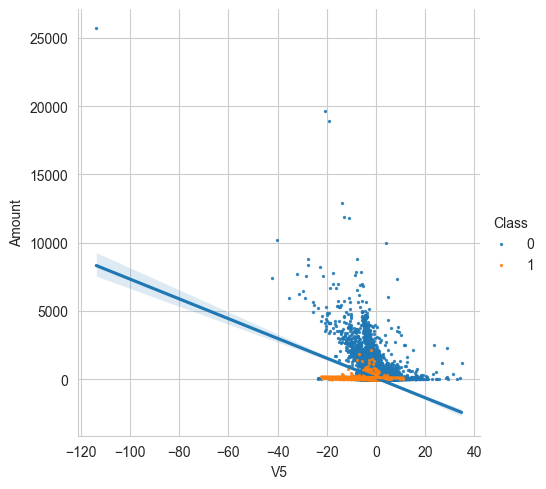

In [123]:
s = sns.lmplot(x='V2', y='Amount',data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V5', y='Amount',data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()


Dapat dikonfirmasi bahwa kedua pasangan fitur yang diuji memiliki korelasi terbalik (inverse correlation). Artinya, ketika nilai salah satu fitur meningkat, nilai fitur lainnya cenderung menurun, dan sebaliknya.
- Garis regresi untuk Class = 0 (transaksi bukan fraud), garis regresi menunjukkan kemiringan negatif yang jelas, yang berarti ada hubungan negatif yang kuat antara fitur tersebut dan jumlah transaksi (Amount). Ketika nilai fitur meningkat, jumlah transaksi cenderung menurun.
- Garis regresi untuk Class = 1 (transaksi fraud), garis regresi juga menunjukkan kemiringan negatif, tetapi sangat kecil, yang berarti hubungan negatifnya lemah. Ini menunjukkan bahwa meskipun ada korelasi negatif, dampaknya tidak sekuat pada transaksi yang sah.

c. Plot Kepadatan Fitur (Density Plot) pada Data Transaksi

Setiap fitur dalam dataset, terpisah berdasarkan Class = 0 (transaksi not fraud) dan Class = 1 (transaksi fraud). Setiap plot akan menunjukkan distribusi kepadatan dari masing-masing fitur untuk kedua kelas tersebut, sehingga kita bisa menganalisis perbedaan antara distribusi nilai fitur untuk transaksi fraud dan yang not fraud.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1980\955923673.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1980\955923673.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1980\955923673.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1980\955923673.py:15: UserWarning:



The `bw` parameter is deprec

<Figure size 640x480 with 0 Axes>

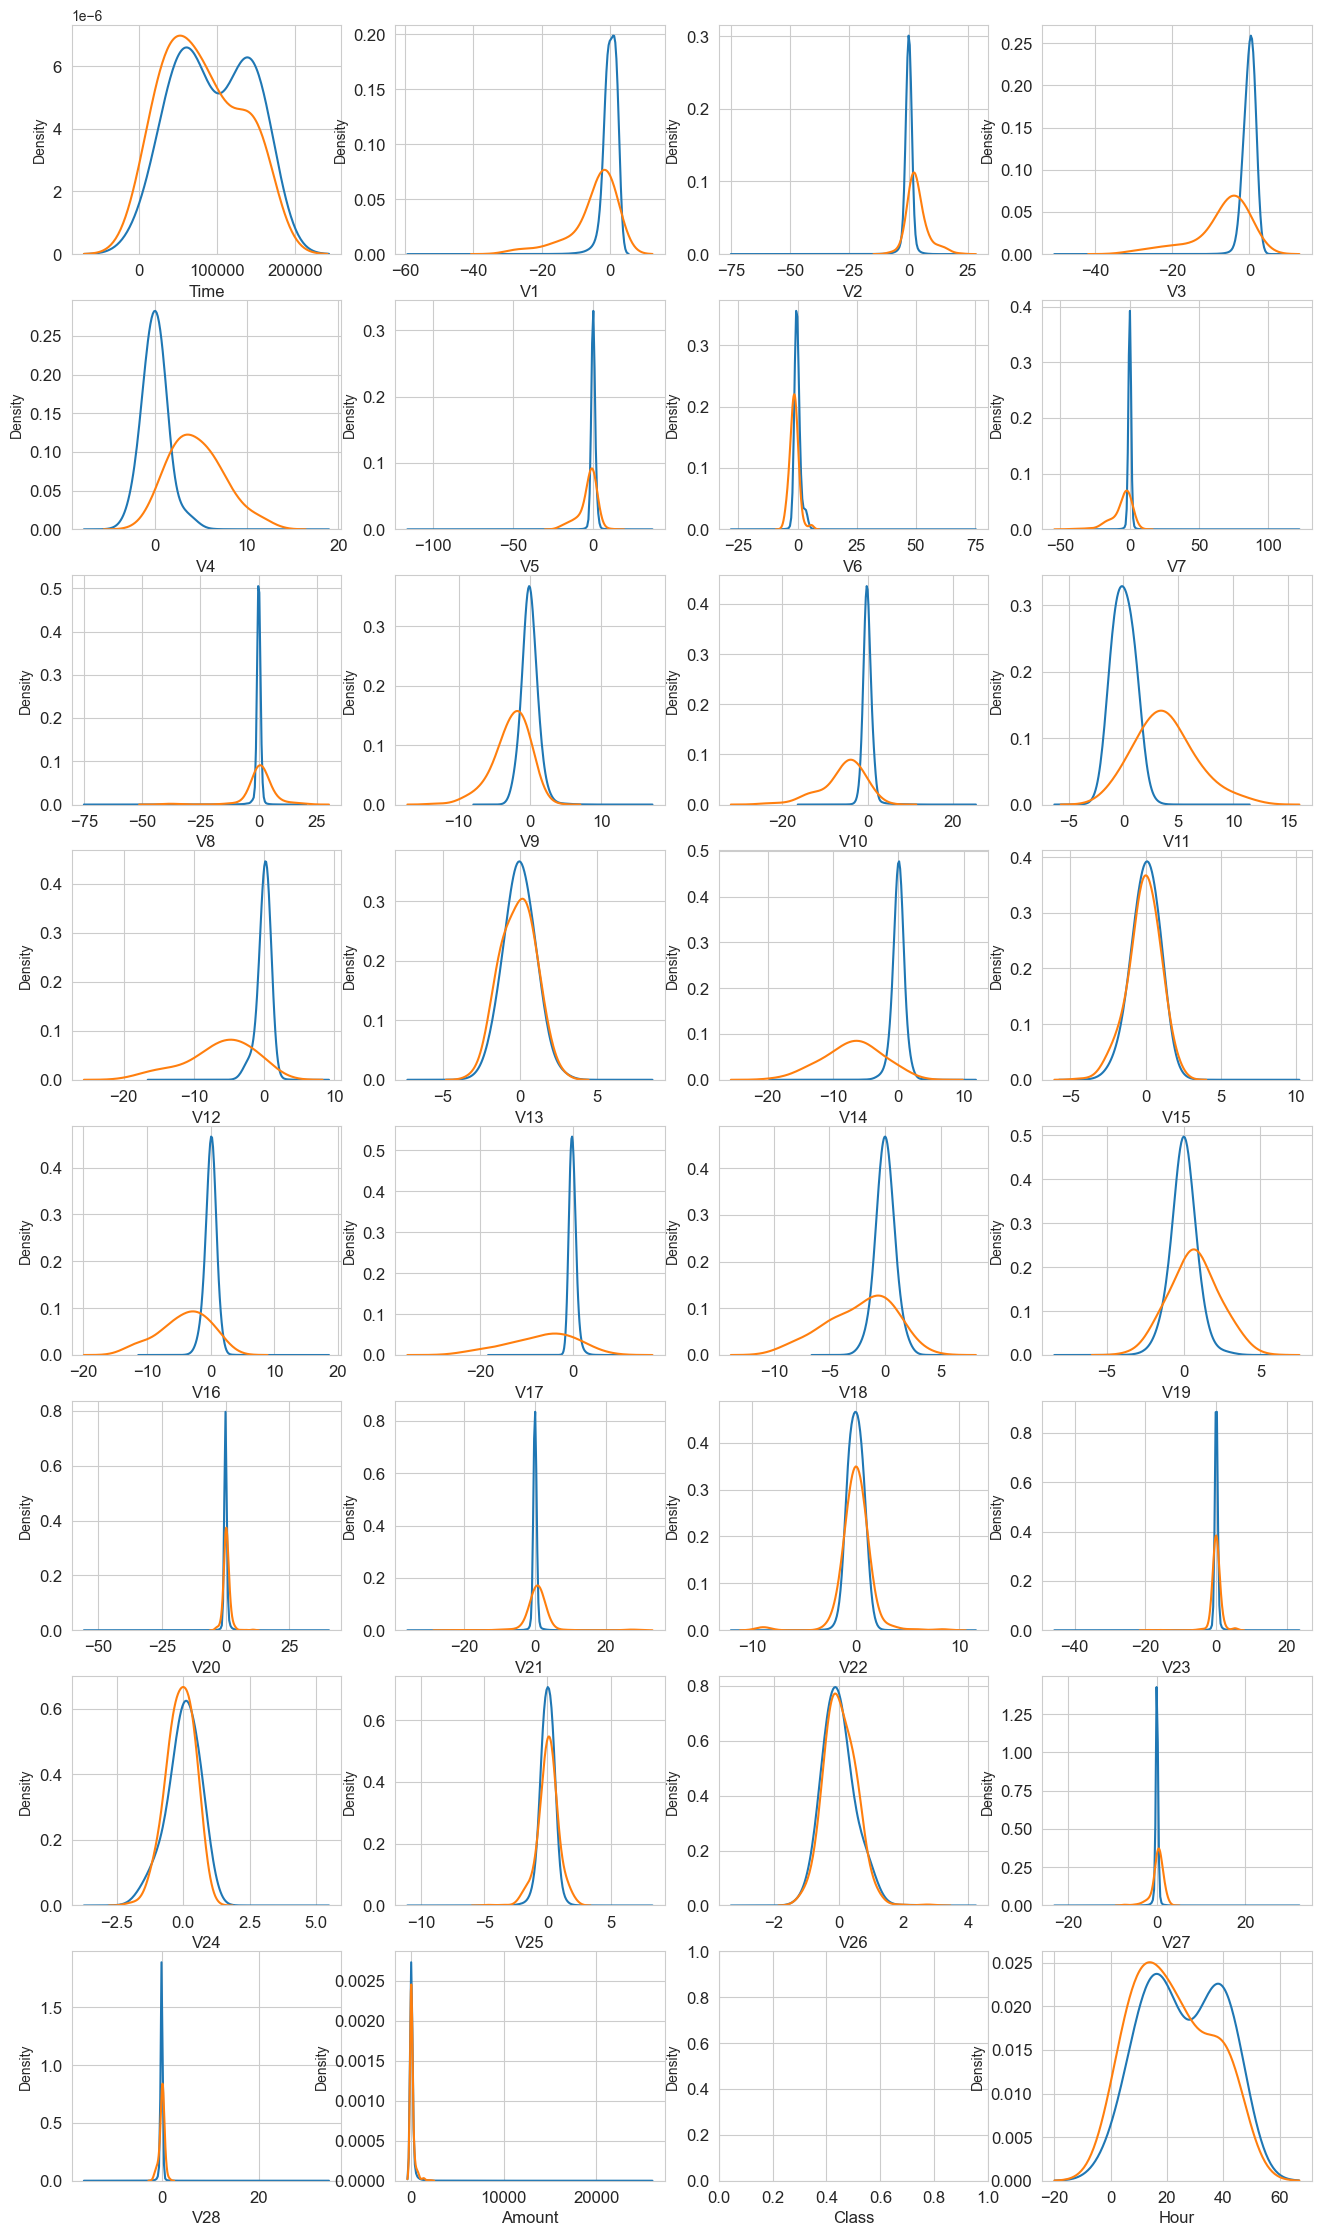

In [124]:
var = data_df.columns.values

i = 0
t0 = data_df.loc[data_df['Class'] == 0]
t1 = data_df.loc[data_df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

Beberapa fitur menunjukkan distribusi yang jelas terpisah antara transaksi not fraud (Class = 0) dan transaksi fraud (Class = 1)
- V4 dan V11 memiliki distribusi yang sangat terpisah antara Class = 0 dan Class = 1, artinya nilai fitur ini sangat berbeda untuk kedua kelas.
- V12, V14, dan V18 memiliki distribusi yang sebagian terpisah, artinya meskipun ada perbedaan, distribusinya masih agak tumpang tindih.
- V1, V2, V3, dan V10 memiliki profil yang cukup berbeda antara Class = 0 dan Class = 1, menunjukkan perbedaan yang signifikan dalam cara kedua kelas tersebar.
- V25, V26, dan V28 memiliki profil yang mirip antara Class = 0 dan Class = 1, artinya distribusi nilai fitur ini hampir sama untuk kedua kelas.

Secara umum, transaksi not fraud (Class = 0) cenderung memiliki nilai fitur yang terpusat di sekitar 0, meskipun ada beberapa nilai ekstrem yang membentuk ekor panjang dan transaksi fraud (Class = 1) memiliki distribusi yang terdistorsi atau miring (asimetris), dengan nilai fitur yang tidak terpusat di tengah.

## Model Prediktif

Definisi variabel prediksi dan variabel target dalam model

In [125]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

Pemisahan data menjadi data pelatihan, validasi, dan pengujian

Data pelatihan = 64%, data validasi = 16%, dan data pengujian adalah 20%

In [126]:
from sklearn.model_selection import train_test_split


#TRAIN/VALIDATION/TEST SPLIT
#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split
TEST_SIZE = 0.20 # test size using_train_test_split
RANDOM_STATE = 2018

train_df, test_df = train_test_split(data_df, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

<u> **1. Random Forest Classifier**

Menjalankan model menggunakan training set untuk training dan menggunakan validation set untuk validasi. 

Kriteria validasi GINI akan digunakan dalam proses validasinya. Rumusnya adalah **GINI = 2 * (AUC) - 1**, dimana rumus **AUC** adalah **Receiver Operating Characteristic - Area Under Curve (ROC - AUC)**. Jumlah estimator ditetapkan menjadi **100** dan jumlah pekerjaan (parallel jobs) ditetapkan menjadi **4**.

In [127]:
from sklearn.ensemble import RandomForestClassifier

RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier

clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

Train dengan Random Forest Classifier menggunakan data train_df dan fit function

In [128]:
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=4, random_state=2018, verbose=False)

Prediksi target value untuk data valid_df menggunakan predict function

In [129]:
preds = clf.predict(valid_df[predictors])

*a. Feature Importance*

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1980\3868662317.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



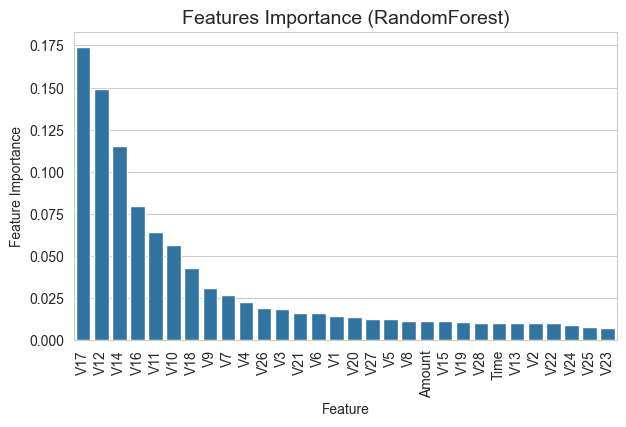

In [131]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature Importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature Importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features Importance (RandomForest)',fontsize=14)
s = sns.barplot(x='Feature',y='Feature Importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

The most important features are **V17, V12, V14, V10, V16, and V11.**

*b. Confussion Matrix*

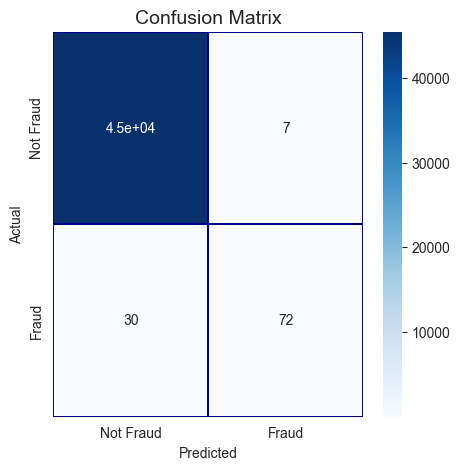

In [132]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

Confusion Matrix bukan tool yang ideal untuk merepresentasikan hasil dalam kasus data yang sangat tidak seimbang (largely unbalanced data). Dalam situasi ini, kita membutuhkan metrik lain yang dapat mengukur sensitivitas (selectivity) dan spesifisitas (specificity) metode yang digunakan, sehingga kita dapat meminimalkan baik error (kesalahan) Tipe I maupun error Tipe II secara bersamaan.
- Hipotesis Nol (H0): Transaksi bukan penipuan (Not Fraud)
- Hipotesis Alternatif (H1): Transaksi adalah penipuan (Fraud)
- Error Tipe I: Anda menolak hipotesis nol padahal hipotesis nol sebenarnya benar (transaksi sah dianggap penipuan).
- Error Tipe II: Anda gagal menolak hipotesis nol padahal hipotesis alternatif sebenarnya benar (penipuan dianggap transaksi sah).
- Cost dari Error Tipe I: Transaksi sah salah dianggap penipuan, sehingga transaksi yang benar ditolak.
- Cost dari Error Tipe II: Transaksi penipuan salah dianggap bukan penipuan, sehingga penipuan lolos.

Berikut ini adalah gambar yang menjelaskan apa itu True Positive, True Negative, False Positive (Error Tipe 1) dan False Negative (Error Tipe II() :

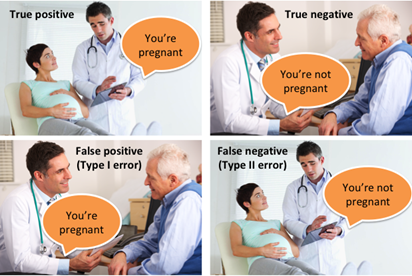

*c. ROC-AUC (Area Under Curve)*

In [133]:
from sklearn.metrics import roc_auc_score

roc_auc_score(valid_df[target].values, preds)

np.float64(0.8528641975628091)

Skor **ROC-AUC** yang diperoleh dengan **Random Forrest Classifier** adalah **0.85**

<u> **2. AdaBoost Classifier**

AdaBoost Classifier adalah singkatan dari Adaptive Boosting Classifier

Prepare model dengan tetapkan paramater untuk model dan inisialisasi model

In [134]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(random_state=RANDOM_STATE,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=NUM_ESTIMATORS)



Melatih modelnya

In [135]:
clf.fit(train_df[predictors], train_df[target].values)

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=2018)

Prediksi nilai target untuk data valid_df menggunakan predict function

In [136]:
preds = clf.predict(valid_df[predictors])

*a. Feature Importance*

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1980\3475516364.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



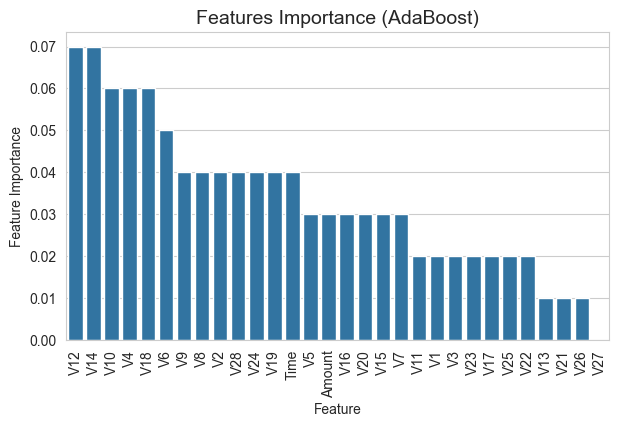

In [137]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature Importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature Importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features Importance (AdaBoost)',fontsize=14)
s = sns.barplot(x='Feature',y='Feature Importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

*b. Confusion Matrix*

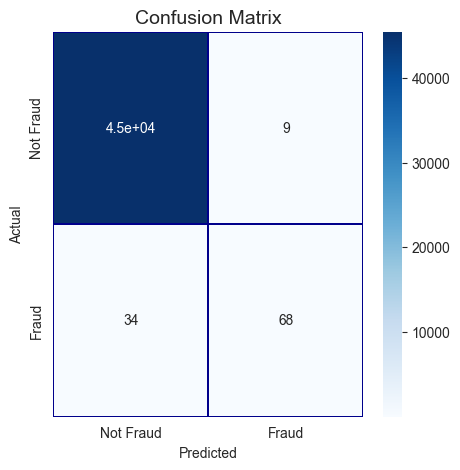

In [138]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

*c. ROC-AUC (Area Under Curve)*

In [139]:
roc_auc_score(valid_df[target].values, preds)

np.float64(0.8332343604519027)

Skor **ROC-AUC** yang diperoleh dengan **AdaBoost Classifier** adalah **0.83**

<u> **3. XGBoost**

XGBoost adalah singkatan dari Extreme Gradient Boosting.

In [140]:
import xgboost as xgb


MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop 
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result

Prepare model dengan tetapkan paramater untuk model dan inisialisasi objek DMatrix untuk training dan validation dari dataset

In [141]:
# Prepare the train and valid datasets
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(valid_df[predictors], valid_df[target].values)
dtest = xgb.DMatrix(test_df[predictors], test_df[target].values)

#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

Melatih modelnya

In [142]:
model = xgb.train(params, 
                dtrain, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:723: FutureWarning:

Pass `evals` as keyword args.

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning:

[15:27:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "silent" } are not used.




[0]	train-auc:0.94070	valid-auc:0.88630
[50]	train-auc:0.94200	valid-auc:0.89009
[100]	train-auc:0.97584	valid-auc:0.96685
[150]	train-auc:0.98525	valid-auc:0.97960
[200]	train-auc:0.99279	valid-auc:0.98495
[250]	train-auc:0.99493	valid-auc:0.98352
[257]	train-auc:0.99511	valid-auc:0.98382


Paramaters : {"silent"} are not used. Hal ini mungkin tidak akurat karena beberapa parameter hanya digunakan dalam pengikatan bahasa tetapi diteruskan ke inti XGBoost. Atau beberapa parameter tidak digunakan tetapi lolos dari verifikasi ini. 

Validation score (**ROC-AUC**) paling terbaik dengan **XGBoost** adalah **0.984** pada putaran ke-**200**

*a. Feature Importance*

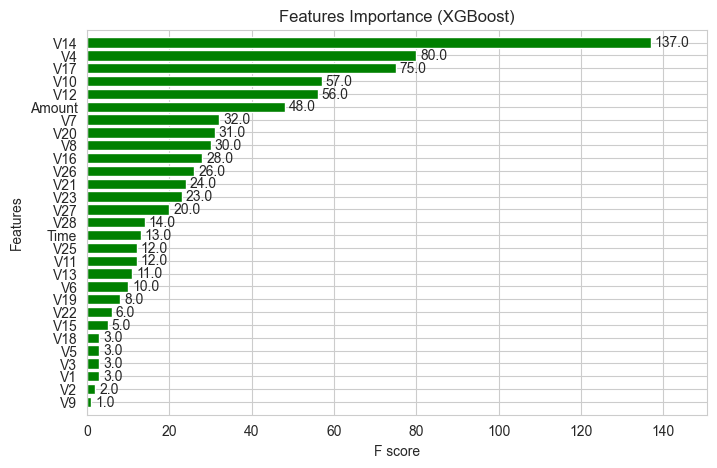

In [143]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features Importance (XGBoost)", ax=ax, color="green") 
plt.show()

Menggunakan set train dan validation untuk training dan validation. Kemudian menggunakan model yang telah dilatih untuk memprediksi nilai target untuk test set

In [144]:
preds = model.predict(dtest)

b. ROC-AUC (Area Under Curve)

In [145]:
roc_auc_score(test_df[target].values, preds)

np.float64(0.9803156765502444)

Skor **ROC-AUC** untuk prediksi data baru (test set) adalah **0.980**.

<u> **4. LightGBM**

LightGBM adalah singkatan dari Light Gradient-Boosting Machine.

In [146]:
import lightgbm as lgb

MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop 
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result

Define paramater model yang akan hanya digunakan untuk model LGB pertama

In [147]:
params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,  # we should let it be smaller than 2^(max_depth)
          'max_depth': 4,  # -1 means no limit
          'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
          'max_bin': 100,  # Number of bucketed bin for feature values
          'subsample': 0.9,  # Subsample ratio of the training instance.
          'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
          'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree.
          'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
          'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
          'num_threads': 8,
          'verbose': 0,
          'scale_pos_weight':150, # because training data is extremely unbalanced 
         }

Prepare model dengan membuat struktur data dataset dari set train dan validation

In [148]:
dtrain = lgb.Dataset(train_df[predictors].values, 
                     label=train_df[target].values,
                     feature_name=predictors)

dvalid = lgb.Dataset(valid_df[predictors].values,
                     label=valid_df[target].values,
                     feature_name=predictors)



Run model dengan menggunakan train function

In [149]:
evals_results = {}  # Tempat menyimpan hasil evaluasi

# Buat callback untuk mencetak hasil evaluasi setiap 100 iterasi
def custom_print_eval(env):
    if env.iteration % 100 == 0:
        print(f"Iteration {env.iteration}: Train AUC={env.evaluation_result_list[0][2]:.4f}, Valid AUC={env.evaluation_result_list[1][2]:.4f}")

callbacks = [
    lgb.record_evaluation(evals_results),  # Rekam hasil evaluasi
    lgb.early_stopping(stopping_rounds=100),  # Early stopping
    custom_print_eval  # Cetak evaluasi secara custom
]

model = lgb.train(params, 
                  dtrain, 
                  valid_sets=[dtrain, dvalid], 
                  valid_names=['train', 'valid'], 
                  num_boost_round=1000, 
                  callbacks=callbacks)  # Gunakan callbacks


Iteration 0: Train AUC=0.9692, Valid AUC=0.9412
Training until validation scores don't improve for 100 rounds
Iteration 100: Train AUC=0.9990, Valid AUC=0.9456
Early stopping, best iteration is:
[29]	train's auc: 0.996594	valid's auc: 0.957864


Validation score paling terbaik dengan **LightGBM** adalah **0.957** pada putaran ke-**29**

*a. Feature Importance*

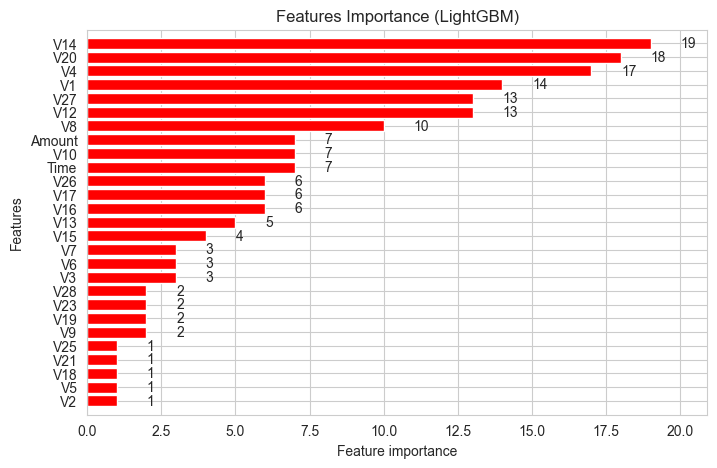

In [150]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
lgb.plot_importance(model, height=0.8, title="Features Importance (LightGBM)", ax=ax,color="red") 
plt.show()

Prediksi data test

In [151]:
preds = model.predict(test_df[predictors])

*b. ROC-AUC (Area Under Curve)*

In [152]:
roc_auc_score(test_df[target].values, preds)

np.float64(0.9473337202349548)

Skor **ROC-AUC** untuk prediksi test set adalah **0.947**.

*c. Training and Validation using Cross-Validation*

Menggunakan cross-validation(KFolds) dengan 5 fold, dimana data dibagi menjadi 5 fold dan dengan rotasi. 
Melatih menggunakan 4 fold(n-1) dan melakukan validadis menggunakan fold ke-5.

In [153]:
import gc
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier

NUMBER_KFOLDS = 5 #number of KFolds for cross-validation


Test set dihitung sebagai rata-rata dari nilai prediksi

In [154]:
kf = KFold(n_splits = NUMBER_KFOLDS, random_state = RANDOM_STATE, shuffle = True)

# Create arrays and dataframes to store results
oof_preds = np.zeros(train_df.shape[0])
test_preds = np.zeros(test_df.shape[0])
feature_importance_df = pd.DataFrame()
n_fold = 0
for train_idx, valid_idx in kf.split(train_df):
    train_x, train_y = train_df[predictors].iloc[train_idx],train_df[target].iloc[train_idx]
    valid_x, valid_y = train_df[predictors].iloc[valid_idx],train_df[target].iloc[valid_idx]
    
    evals_results = {}
    model =  LGBMClassifier(
                  nthread=-1,
                  n_estimators=2000,
                  learning_rate=0.01,
                  num_leaves=80,
                  colsample_bytree=0.98,
                  subsample=0.78,
                  reg_alpha=0.04,
                  reg_lambda=0.073,
                  subsample_for_bin=50,
                  boosting_type='gbdt',
                  is_unbalance=False,
                  min_split_gain=0.025,
                  min_child_weight=40,
                  min_child_samples=510,
                  objective='binary',
                  metric='auc',
                  silent=-1,
                  verbose=-1,
                  feval=None)
    model.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
                eval_metric= 'auc')
    
    oof_preds[valid_idx] = model.predict_proba(valid_x, num_iteration=model.best_iteration_)[:, 1]
    test_preds += model.predict_proba(test_df[predictors], num_iteration=model.best_iteration_)[:, 1] / kf.n_splits
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = predictors
    fold_importance_df["importance"] = clf.feature_importances_
    fold_importance_df["fold"] = n_fold + 1
    
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))
    del model, train_x, train_y, valid_x, valid_y
    gc.collect()
    n_fold = n_fold + 1
train_auc_score = roc_auc_score(train_df[target], oof_preds)
print('Full AUC score %.6f' % train_auc_score)                                    

Fold  1 AUC : 0.997040
Fold  2 AUC : 0.958926
Fold  3 AUC : 0.949589
Fold  4 AUC : 0.993605
Fold  5 AUC : 0.986343
Full AUC score 0.975615


Skor AUC untuk prediksi dari data test adalah **0.975**

## Kesimpulan

Data diselidiki dengan memeriksa ketidakseimbangan data, memvisualisasikan fitur-fitur, dan memahami hubungan antar fitur yang berbeda. Kemudian, dua model prediktif diuji. Data dibagi menjadi 3 bagian: set pelatihan, set validasi, dan test set. Untuk tiga model pertama, hanya set pelatihan dan test set yang digunakan.

Dimulai dengan **Random Forest Classifier**, yang menghasilkan skor AUC sebesar **0.85** saat memprediksi target untuk test set.

Dilanjutkan dengan model **AdaBoost Classifier**, dengan skor AUC lebih rendah, yaitu **0.83** untuk prediksi nilai target test set.

Kemudian, eksperimen dilakukan dengan model **XGBoost**. Dalam hal ini, set validasi digunakan untuk memvalidasi model pelatihan. Skor validasi terbaik yang diperoleh adalah **0.984**. Model dengan langkah pelatihan terbaik digunakan untuk memprediksi nilai target dari data tes; skor AUC yang diperoleh adalah **0.980**.

Selanjutnya, data diperkenalkan ke model **LightGBM**. Kedua metode pembagian pelatihan-validasi dan cross-validation digunakan untuk mengevaluasi efektivitas model dalam memprediksi nilai "Class", yaitu mendeteksi apakah transaksi merupakan penipuan. Dengan metode pertama, diperoleh nilai AUC untuk set validasi sekitar **0.957**. Untuk test set, skor yang diperoleh adalah **0.947**.
Dengan cross-validation, skor AUC untuk prediksi tes yang diperoleh adalah **0.975**.